In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import scanpy as sc
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score

In [2]:
def get_DLPFC_annotations(section_id):
    input_dir = os.path.join('dataset/DLPFC', section_id)
    adata = sc.read_visium(path=input_dir, count_file='filtered_feature_bc_matrix.h5')
    Ann_df = pd.read_csv(os.path.join('dataset/DLPFC', section_id,'metadata.tsv'), sep='\t')
    adata.obs['Ground Truth'] = Ann_df.loc[adata.obs_names, 'layer_guess']
    print(adata)
    return adata

In [3]:
# DLPFC
s = '151507'
adata = get_DLPFC_annotations(s)
cluster = np.loadtxt("result/DLPFC/"+s+"/lambdaI0.8/2500__types.txt")
cluster = cluster[:, 1].astype(int).astype(str)
adata.obs['cluster'] = cluster
temp = adata[~adata.obs['Ground Truth'].isnull()]
temp
print("ARI: ",np.round(adjusted_rand_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))
print("NMI: ",np.round(normalized_mutual_info_score(temp.obs['cluster'],temp.obs['Ground Truth']),3))

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Ground Truth'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
ARI:  0.598
NMI:  0.693


In [4]:
# MH
import anndata as ad
counts_file = 'dataset/MH/Puck_190921_21.digital_expression.txt'
coor_file = 'dataset/MH/Puck_190921_21_bead_locations.csv'
adata = sc.read_text(counts_file, delimiter='\t')
coor_df = pd.read_csv(coor_file, index_col=0)
adata = ad.AnnData(adata.X.T, var =adata.obs ,obs=adata.var)
adata.var_names_make_unique()
coor_df = coor_df.loc[adata.obs_names, ['xcoord', 'ycoord']]
adata

AnnData object with n_obs × n_vars = 20143 × 19653

In [5]:
adata.obsm["spatial"] = coor_df.to_numpy()
stDGCC = np.loadtxt("result/MH/lambdaI0.2/20000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)

<AxesSubplot:title={'center':' '}, xlabel='spatial1', ylabel='spatial2'>

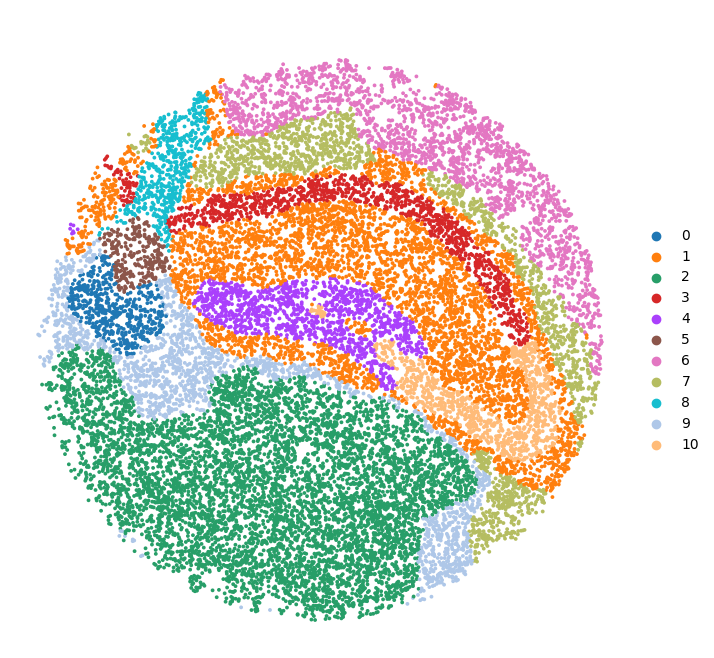

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
dic = {'0':'5',
      '1':'1',
       '2':'2',
       '3':'3',
       '4':'4',
       '5':'0',
       '6':'6',
       '7':'7',
       '8':'8',
       '9':'9',
       '10':'10'
      }
for i in range(stDGCC.shape[0]):
    stDGCC[i] = dic[stDGCC[i]]
adata.obs['stDGCC'] = stDGCC
sc.pl.embedding(adata[((adata.obsm['spatial'][:,0]-3200)**2 + (adata.obsm['spatial'][:,1]-3100)**2 < 2500**2)], 
                basis="spatial", color="stDGCC",s=30, show=False, title=' ' ,frameon=False,colorbar_loc= None
               )
#                save = 'stDGCC.png')

In [7]:
# MH slideseq1
count_file = 'dataset/MH1/MappedDGEForR.csv'
pos_file = 'dataset/MH1/BeadLocationsForR.csv'
adata = sc.read_csv(count_file)
adata = ad.AnnData(adata.X.T, var =adata.obs ,obs=adata.var)
coordinates = pd.read_csv(pos_file, index_col=0)
spatial = coordinates.loc[adata.obs_names, ['xcoord', 'ycoord']].to_numpy()
adata.var_names_make_unique()
adata.obsm['spatial'] = spatial
adata

AnnData object with n_obs × n_vars = 18508 × 17275
    obsm: 'spatial'

<AxesSubplot:title={'center':' '}, xlabel='spatial1', ylabel='spatial2'>

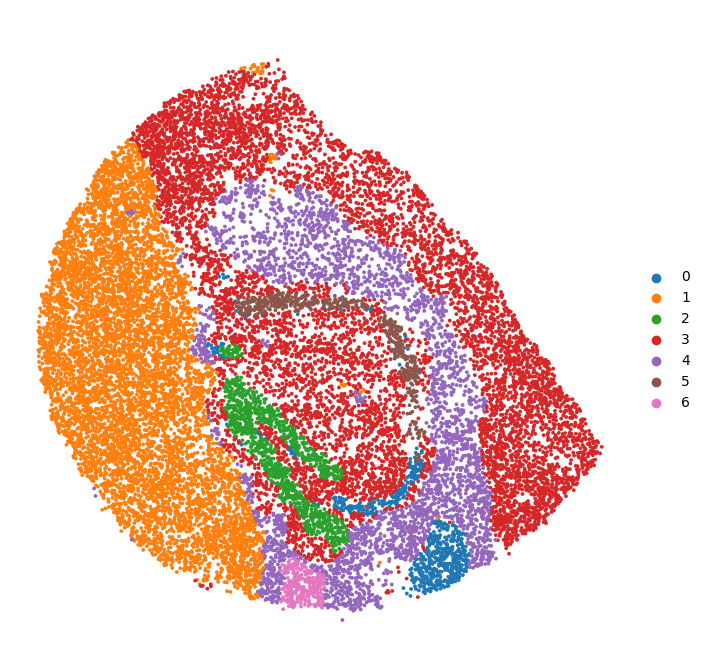

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
stDGCC = np.loadtxt("result/MH1/lambdaI0.2/12000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)
adata.obs['stDGCC'] = stDGCC
sc.pl.embedding(adata, 
                basis="spatial", color="stDGCC",s=30, show=False, title=' ' ,frameon=False,colorbar_loc= None
               )

In [9]:
# MB
adata = sc.read_visium(path='dataset/MB', count_file='filtered_feature_bc_matrix.h5')
adata.var_names_make_unique()
adata = adata[(adata.obsm['spatial'][:,1]>2750) & (adata.obsm['spatial'][:,1]<5500) & (adata.obsm['spatial'][:,0]<6500)]

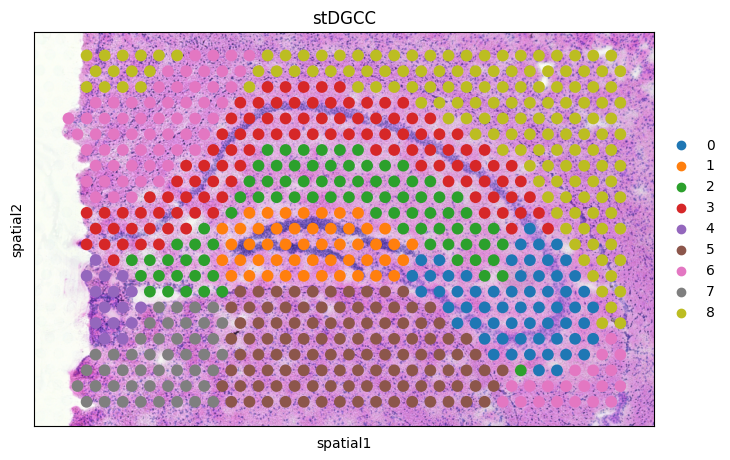

In [10]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams['savefig.dpi'] = 600
stDGCC = np.loadtxt("result/MB/lambdaI0.8/7000__types.txt")
stDGCC = stDGCC[:, 1].astype(int).astype(str)
dic = {'0':'7',
      '1':'8',
       '2':'2',
       '3':'1',
       '4':'3',
       '5':'0',
       '6':'6',
       '7':'4',
       '8':'5'
      }
for i in range(stDGCC.shape[0]):
    stDGCC[i] = dic[stDGCC[i]]
adata.obs['stDGCC'] = stDGCC
sc.pl.spatial(adata, color = 'stDGCC',img_key="hires")